<a href="https://colab.research.google.com/github/Krishdataeng/DS/blob/main/Iris_K_DBScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
d = files.upload()

In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df = df.drop('Id',axis=1)

In [ ]:
df = df.drop('Species', axis = 1)

In [ ]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0


In [ ]:
x = df.iloc[:,0:4].values

In [ ]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

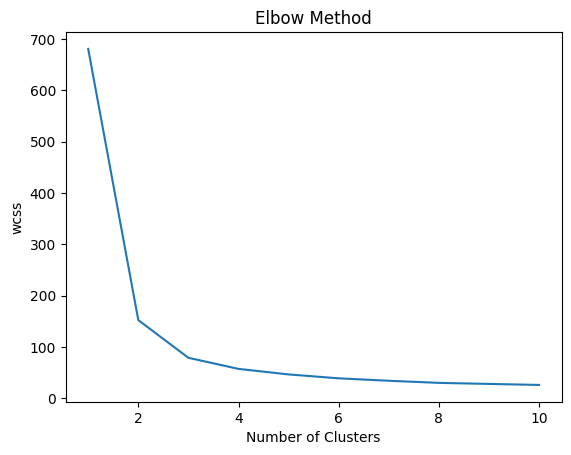

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
model2 = DBSCAN(eps=0.3, min_samples=10)

In [ ]:
model2.fit(x)

DBSCAN(eps=0.3, min_samples=10)

In [ ]:
label = model2.labels_

In [ ]:
label

array([ 0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1,
        0, -1,  0, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

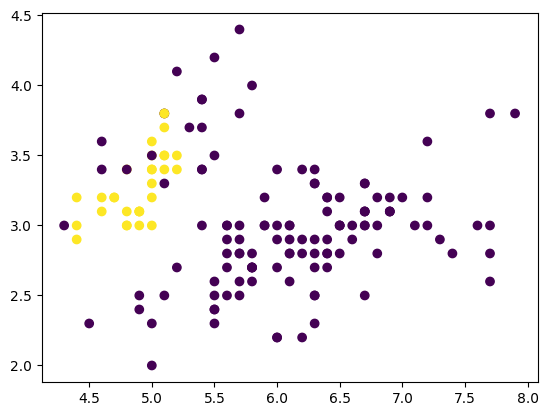

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=label)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model3 =AgglomerativeClustering(n_clusters=5)

In [ ]:
model3.fit(x)

AgglomerativeClustering(n_clusters=5)

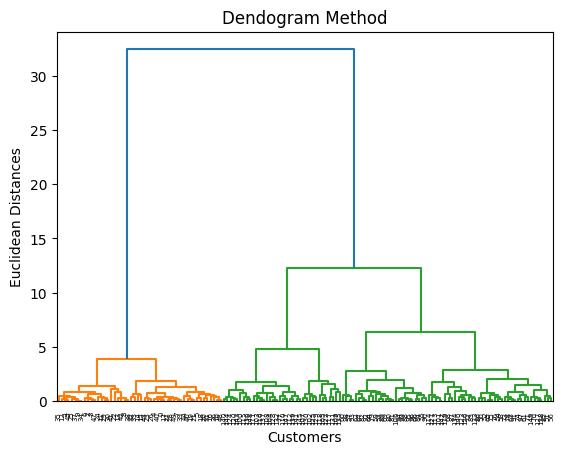

In [ ]:
import scipy.cluster.hierarchy as sch
d_gram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendogram Method')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.savefig('img_1.png', dpi=500)
plt.show()

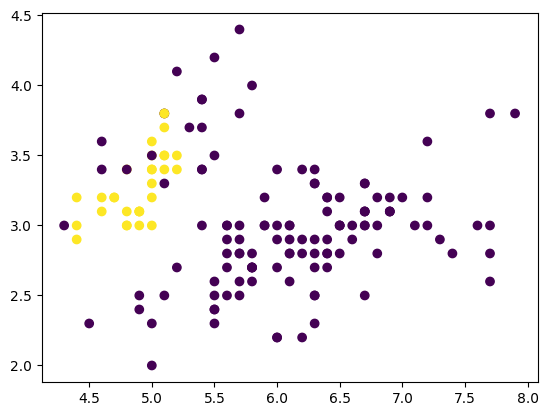

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=label)

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
sh_score=silhouette_score(x, label)

In [ ]:
sh_score

0.41376582777222976

In [ ]:
ch_score = calinski_harabasz_score(x, label)

In [ ]:
ch_score

98.84889409974905

In [ ]:
da_score = davies_bouldin_score(x, label)

In [ ]:
da_score

0.5522369568095535

In [ ]:
pip install scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

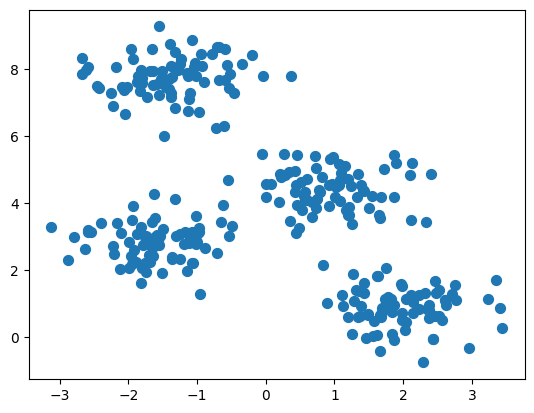

In [ ]:
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [ ]:
y_kmeans = kmeans.predict(X)

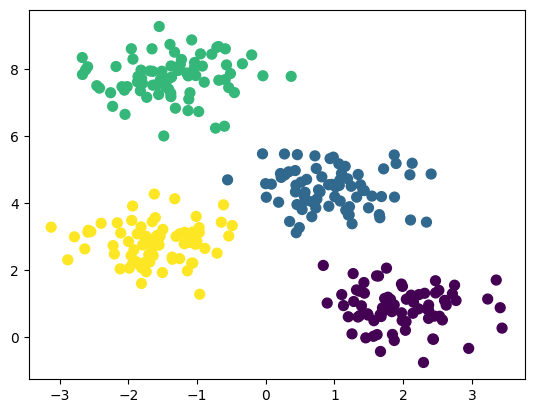

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

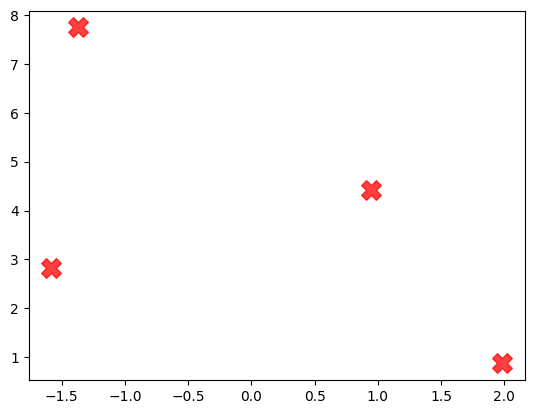

In [ ]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.68


In [ ]:
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.2f}')

Inertia: 212.01


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.6819938690643478


In [ ]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.43756400782378385


In [ ]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X, kmeans.labels_)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 1210.0899142587816


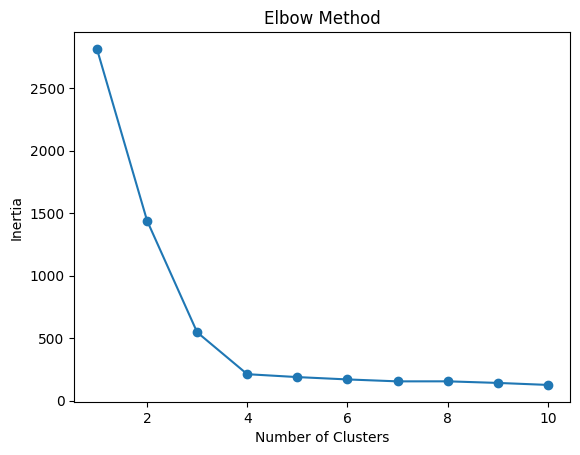

In [ ]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(true_labels, kmeans.labels_)
print(f'Adjusted Rand Index: {ari}')

NameError: name 'true_labels' is not defined

In [ ]:
from sklearn.metrics import adjusted_rand_score
# Assign the ground truth labels to true_labels
true_labels = y
ari = adjusted_rand_score(true_labels, kmeans.labels_)
print(f'Adjusted Rand Index: {ari}')

Adjusted Rand Index: 0.6254576374265342


In [ ]:
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(true_labels, kmeans.labels_)
print(f'Normalized Mutual Information: {nmi}')

Normalized Mutual Information: 0.770793702582447


New Data Set


In [ ]:
# Example matrix (4 data points, 2 features)
data = [
    [1, 2],
    [1, 4],
    [1, 0],
    [10, 2],
    [10, 4],
    [10, 0]
]

In [ ]:
import numpy as np

# Convert the list to a NumPy array
X = np.array(data)
print(X)

[[ 1  2]
 [ 1  4]
 [ 1  0]
 [10  2]
 [10  4]
 [10  0]]


In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_
print("Cluster Labels:", labels)

Cluster Labels: [0 0 0 1 1 1]


In [ ]:
centroids = kmeans.cluster_centers_
print("Cluster Centers:\n", centroids)

Cluster Centers:
 [[ 1.  2.]
 [10.  2.]]


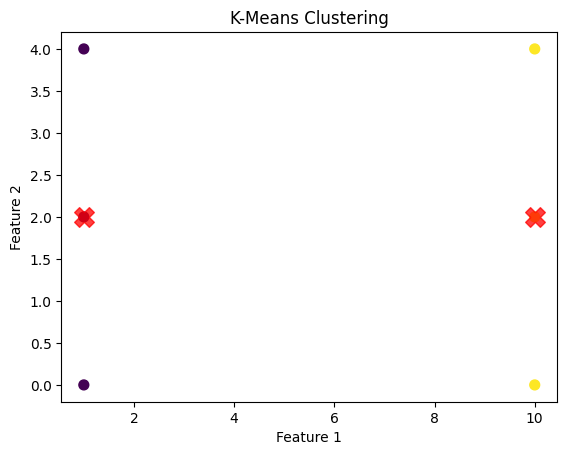

In [ ]:
import matplotlib.pyplot as plt

# Plot the data points, colored by cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, alpha=0.75)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 2)

# Define the Minkowski distance metric
def minkowski_distance(X, Y, p):
    return pairwise_distances(X, Y, metric='minkowski', p=p)

# Create a KMeans model with Minkowski distance metric
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10)

# Define a custom distance metric for KMeans
kmeans.distance_metric = lambda X, Y: minkowski_distance(X, Y, p=3)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

print("Cluster labels:", labels)
print("Cluster centers:", centers)

Cluster labels: [9 9 9 5 2 6 5 8 7 5 2 5 0 7 6 0 9 0 9 2 4 3 9 8 4 6 3 8 6 1 8 3 4 3 3 2 2
 3 8 8 4 0 1 1 5 0 0 8 1 3 6 5 0 9 7 5 6 6 2 2 6 2 9 4 6 6 4 9 9 6 6 5 2 7
 5 7 0 7 2 1 6 5 2 4 3 1 8 3 7 3 0 1 2 9 6 1 7 6 4 4]
Cluster centers: [[0.16578604 0.65791058]
 [0.50579285 0.14938809]
 [0.9234517  0.63320587]
 [0.7797579  0.09649295]
 [0.18236966 0.3591488 ]
 [0.58756956 0.89629571]
 [0.69647779 0.39163321]
 [0.16146165 0.90476354]
 [0.21470184 0.11604721]
 [0.54600585 0.61587283]]


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 2)

# Minkowski distance function
def minkowski_distance(X, Y, p=3):
    return pairwise_distances(X, Y, metric='minkowski', p=p)

# K-Means with Minkowski distance
class KMeansMinkowski:
    def __init__(self, n_clusters=10, p=3, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.p = p
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, X):
        m, _ = X.shape
        self.centroids = X[np.random.choice(m, self.n_clusters, replace=False)]  # Initialize centroids

        for _ in range(self.max_iters):
            # Compute Minkowski distances
            distances = minkowski_distance(X, self.centroids, self.p)
            self.labels = np.argmin(distances, axis=1)  # Assign clusters

            # Update centroids
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Check convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = minkowski_distance(X, self.centroids, self.p)
        return np.argmin(distances, axis=1)

# Run the model
kmeans = KMeansMinkowski(n_clusters=3, p=3)
kmeans.fit(X)

print("Cluster labels:", kmeans.labels)
print("Cluster centers:", kmeans.centroids)


Cluster labels: [1 0 2 1 0 1 0 2 1 2 2 2 1 1 2 2 1 0 2 0 1 1 1 1 2 0 0 0 2 2 2 0 1 1 1 0 1
 0 2 2 0 2 2 0 0 1 0 0 2 2 1 1 0 1 2 2 0 0 0 0 0 2 2 0 1 2 2 0 0 1 0 2 2 0
 2 0 1 0 0 1 1 0 1 2 1 2 2 2 0 0 2 0 1 0 2 1 0 2 0 0]
Cluster centers: [[0.8039633  0.57026999]
 [0.18520943 0.72228065]
 [0.36376248 0.20008043]]


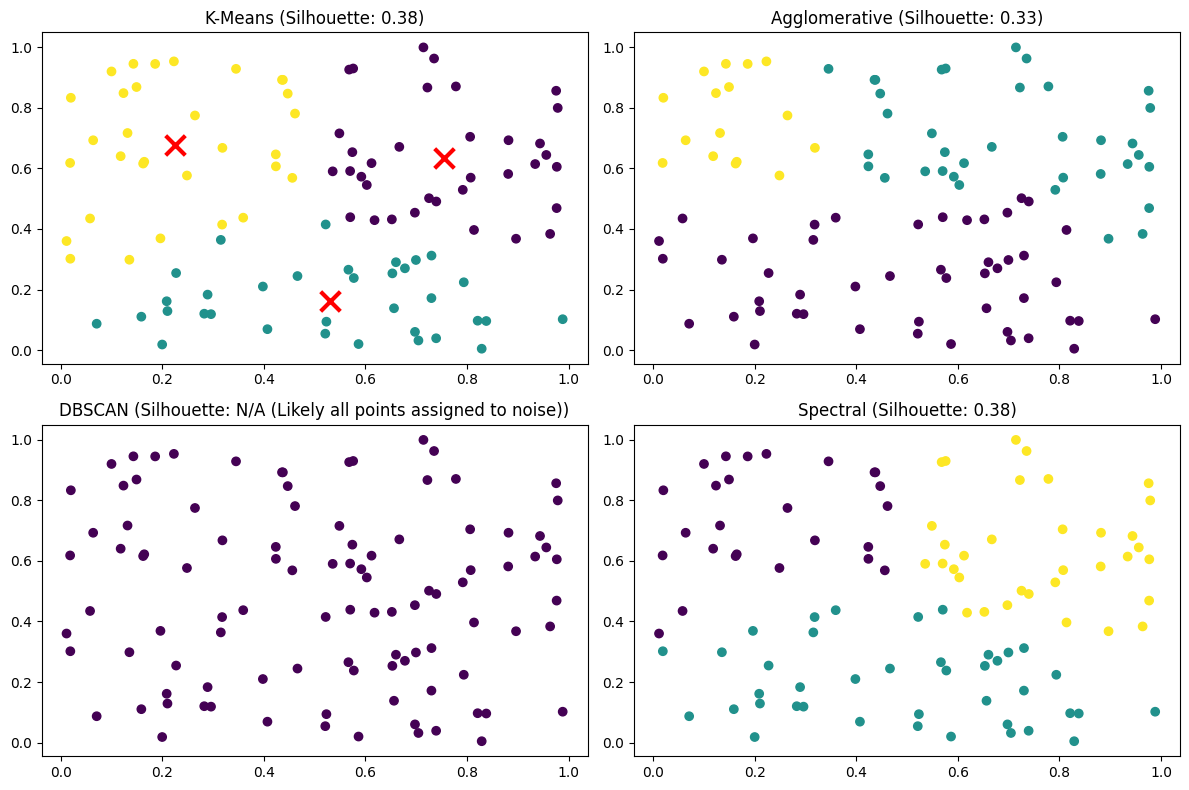

K-Means Cluster Centers:
 [[0.75377377 0.63262143]
 [0.53079199 0.16305589]
 [0.22477318 0.67757842]]

--- DBSCAN Details ---
DBSCAN Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number of Core Points: 98
Number of Noise Points: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score

# Generate some sample data (you can customize this)
np.random.seed(0)
X = np.random.rand(100, 2)

# --- K-Means Clustering ---
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42) # Added random_state for reproducibility
kmeans_labels = kmeans.fit_predict(X)
kmeans_centers = kmeans.cluster_centers_
kmeans_silhouette = silhouette_score(X, kmeans_labels)

# --- Agglomerative Clustering (Hierarchical) ---
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward') # You can change linkage: 'ward', 'complete', 'average', 'single'
agglomerative_labels = agglomerative.fit_predict(X)
agglomerative_silhouette = silhouette_score(X, agglomerative_labels)

# --- DBSCAN Clustering ---
dbscan = DBSCAN(eps=0.2, min_samples=5) # Adjust eps and min_samples based on your data
dbscan_labels = dbscan.fit_predict(X)
#DBSCAN doesn't have cluster centers in the same way as KMeans.  You could calculate the mean of points in each cluster if needed.
#Silhouette score might not be as meaningful for DBSCAN as it is for other methods, as it identifies noise.
try:
  dbscan_silhouette = silhouette_score(X, dbscan_labels)
except ValueError:
  dbscan_silhouette = "N/A (Likely all points assigned to noise)"

# --- Spectral Clustering ---
spectral = SpectralClustering(n_clusters=3, random_state=42) # Added random_state for reproducibility
spectral_labels = spectral.fit_predict(X)
spectral_silhouette = silhouette_score(X, spectral_labels)


# --- Plotting the results ---
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker='x', s=200, linewidths=3, color='red')
plt.title(f"K-Means (Silhouette: {kmeans_silhouette:.2f})")

plt.subplot(2, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title(f"Agglomerative (Silhouette: {agglomerative_silhouette:.2f})")

plt.subplot(2, 2, 3)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title(f"DBSCAN (Silhouette: {dbscan_silhouette})")

plt.subplot(2, 2, 4)
plt.scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis')
plt.title(f"Spectral (Silhouette: {spectral_silhouette:.2f})")

plt.tight_layout()
plt.show()



# --- Printing additional information (optional) ---
print("K-Means Cluster Centers:\n", kmeans_centers)

print("\n--- DBSCAN Details ---")
print("DBSCAN Cluster Labels:", dbscan_labels)
print("Number of Core Points:", sum(dbscan.core_sample_indices_ != -1)) # Core points are important for DBSCAN
print("Number of Noise Points:", sum(dbscan_labels == -1))  # -1 indicates noise in DBSCAN